## IMDB Project


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

basics = pd.read_csv("data/title.basics.tsv", sep="\t", na_values="\\N", low_memory=False)
ratings = pd.read_csv("data/title.ratings.tsv", sep="\t", na_values="\\N")

# Only keep rows where the type is 'movie'
movies = basics[basics['titleType'] == 'movie']


# Join on 'tconst' (IMDb title ID)
movies_with_ratings = pd.merge(movies, ratings, on="tconst")

# Drop rows missing key info
cleaned_movies = movies_with_ratings.dropna(subset=["startYear", "runtimeMinutes", "genres", "averageRating"])

# Convert startYear to numeric
cleaned_movies = cleaned_movies.copy()
cleaned_movies['startYear'] = pd.to_numeric(cleaned_movies['startYear'], errors='coerce')
cleaned_movies = cleaned_movies.dropna(subset=['startYear'])

# Final number of observations
print(f"Number of movie records with ratings: {len(cleaned_movies)}")

# Check a few rows
print(cleaned_movies.head())

# time range
print(f"Movies range from {int(cleaned_movies['startYear'].min())} to {int(cleaned_movies['startYear'].max())}")


Number of movie records with ratings: 285692
      tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000147     movie   The Corbett-Fitzsimmons Fight   
3  tt0000574     movie     The Story of the Kelly Gang   
4  tt0000591     movie                The Prodigal Son   
8  tt0000679     movie  The Fairylogue and Radio-Plays   

                    originalTitle  isAdult  startYear  endYear runtimeMinutes  \
0                      Miss Jerry      0.0     1894.0      NaN             45   
1   The Corbett-Fitzsimmons Fight      0.0     1897.0      NaN            100   
3     The Story of the Kelly Gang      0.0     1906.0      NaN             70   
4               L'enfant prodigue      0.0     1907.0      NaN             90   
8  The Fairylogue and Radio-Plays      0.0     1908.0      NaN            120   

                       genres  averageRating  numVotes  
0                     Romance            5.4       218  
1    

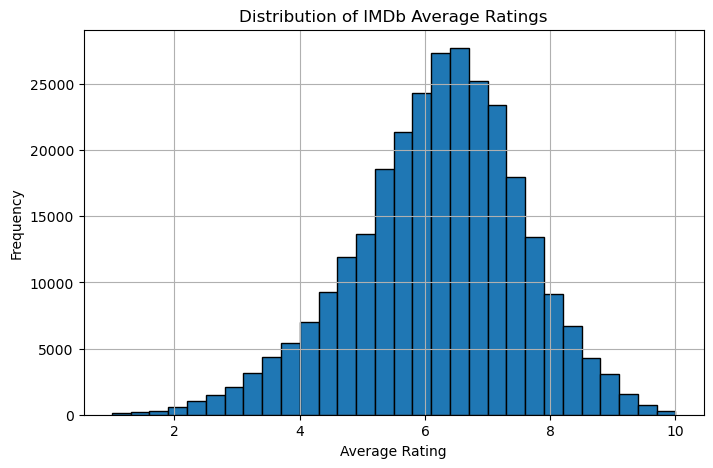

In [5]:
# --- Plot 1: Histogram of IMDb Average Ratings ---
plt.figure(figsize=(8, 5))
plt.hist(cleaned_movies['averageRating'], bins=30, edgecolor='black')
plt.title("Distribution of IMDb Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

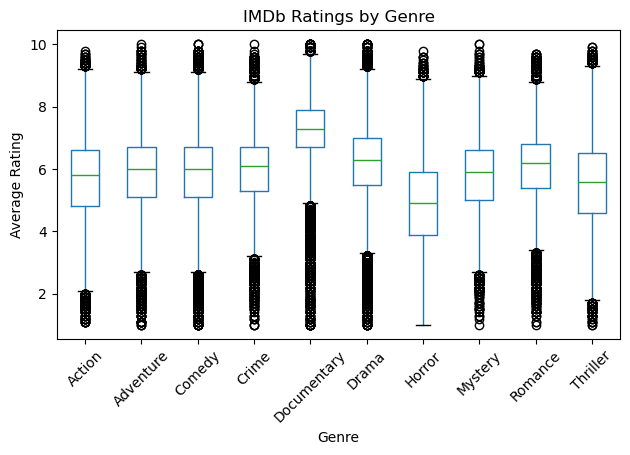

In [6]:
# --- Plot 2: Boxplot of Ratings by Top Genres ---
genre_data = cleaned_movies.copy()
genre_data['genres'] = genre_data['genres'].str.split(',')
genre_data = genre_data.explode('genres')
top_genres = genre_data['genres'].value_counts().nlargest(10).index
genre_data = genre_data[genre_data['genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
genre_data.boxplot(column='averageRating', by='genres', grid=False, rot=45)
plt.title("IMDb Ratings by Genre")
plt.suptitle("")  # remove automatic title
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

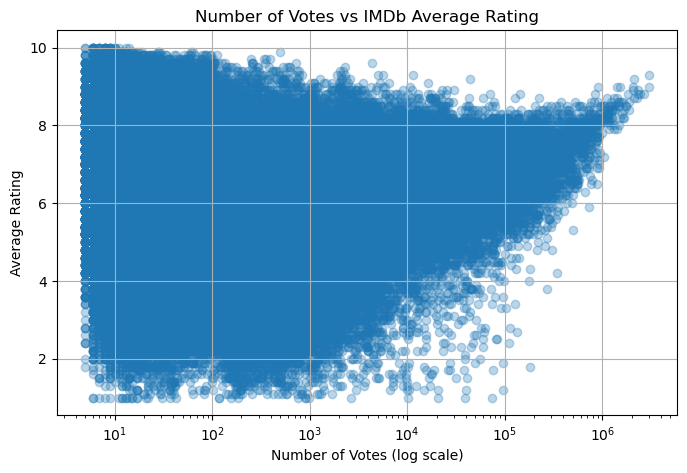

In [7]:
# --- Plot 3: Scatterplot of numVotes vs Average Rating ---
plt.figure(figsize=(8, 5))
plt.scatter(cleaned_movies['numVotes'], cleaned_movies['averageRating'], alpha=0.3)
plt.title("Number of Votes vs IMDb Average Rating")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Average Rating")
plt.xscale("log")
plt.grid(True)
plt.show()